## Import Packages and Read in Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("dsa3101/hackathon/DSA3101_Hackathon_Data.csv")
data.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend
0,Panel 101011101,2017-07-02,CSD,1,1.5,1.5
1,Panel 101011101,2017-07-02,Soy Milk,1,1.0,2.8
2,Panel 101011101,2017-07-02,Cooking Sauces,1,0.3,3.2
3,Panel 101011101,2017-07-02,Coconut Milk,2,0.4,5.3
4,Panel 101011101,2017-07-02,Chocolate,1,0.2,6.6


In [9]:
cat_data = pd.read_csv("dsa3101/hackathon/DSA3101_Hackathon_Categories_Information.csv")
cat_data.head()

,Category,Calories/100g,Price per Volume
0,Baby Cereal,188,29.41
1,Beer,43,15.12
2,Belacan,563,39.47
3,Bird Nest,46,73.45
4,Biscuits,416,15.57


In [6]:
panel_data = pd.read_excel("dsa3101/hackathon/DSA3101_Hackathon_Panelists_Demographics.xlsx")
panel_data.head()

,ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location
0,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North
1,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North
2,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North
3,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North
4,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318024 entries, 0 to 1318023
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Panel ID   1318024 non-null  object 
 1   Date       1318024 non-null  object 
 2   Category   1318024 non-null  object 
 3   Pack Size  1318024 non-null  int64  
 4   Volume     1318024 non-null  float64
 5   Spend      1318024 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 60.3+ MB


In [10]:
data["Date"] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318024 entries, 0 to 1318023
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Panel ID   1318024 non-null  object        
 1   Date       1318024 non-null  datetime64[ns]
 2   Category   1318024 non-null  object        
 3   Pack Size  1318024 non-null  int64         
 4   Volume     1318024 non-null  float64       
 5   Spend      1318024 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 60.3+ MB


,Pack Size,Volume,Spend
count,1.318024e+06,1.318024e+06,1.318024e+06
mean,1.517700e+00,3.208558e+00,9.660460e+00
std,1.961404e+00,7.354977e+00,1.597891e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.000000e-01,3.500000e+00
50%,1.000000e+00,8.000000e-01,5.700000e+00
75%,2.000000e+00,2.000000e+00,1.080000e+01
max,2.850000e+02,6.000000e+02,1.664000e+03


In [7]:
data["Panel ID"].describe()

count             1318024
unique               3236
top       Panel 314213101
freq                 4513
Name: Panel ID, dtype: object

## Anaysis of Products that Customers Buy

### Find Most Popular Products by Frequency of Buying

In [8]:
cat_analysis = data.groupby('Category').agg({'Pack Size': lambda x: sum(x)})
cat_analysis = cat_analysis.reset_index()
cat_analysis = cat_analysis.sort_values(by=['Pack Size'], ascending = False)
quatile = cat_analysis["Pack Size"].quantile([.25, .5, .75])

In [9]:
# Create a new column of popularity based on buying frequency
conditions = [
    (cat_analysis['Pack Size'] <= 5427.5),
    (cat_analysis['Pack Size'] > 5427.5) & (cat_analysis['Pack Size'] <= 15272.5),
    (cat_analysis['Pack Size'] > 15272.5) & (cat_analysis['Pack Size'] <= 49838),
    (cat_analysis['Pack Size'] > 49838)
    ]

# create a list of the values we want to assign for each condition
values = ['Least Popular', 'Less Popular', 'Popular', 'Most Popular']

# create a new column and use np.select to assign values to it using our lists as arguments
cat_analysis['Popular'] = np.select(conditions, values)


In [10]:
cat_analysis[cat_analysis['Popular']=='Most Popular']

,Category,Pack Size,Popular
18,Condensed/Evap Milk,152015,Most Popular
4,Biscuits,147543,Most Popular
56,Sugar,137113,Most Popular
52,Snack,119389,Most Popular
26,Eggs,103896,Most Popular
34,Instant Noodles,96188,Most Popular
20,Cooking Oils,94171,Most Popular
21,Cooking Sauces,87253,Most Popular
48,Rice,75690,Most Popular
17,Coffee,73667,Most Popular


Most frequently bought products are daily essentials like rice, eggs, cooking oils, cooking condiments, etc. This makes sense because these stuffs are used everyday in every household. So people consume them quite fast and need to buy them frequently.

### Least Popular Products

In [11]:
cat_analysis[cat_analysis['Popular']=='Least Popular']

,Category,Pack Size,Popular
43,Milk Powder-Infant,5172,Least Popular
2,Belacan,4250,Least Popular
46,RTD Coffee,3958,Least Popular
35,Instant Soup,3427,Least Popular
37,Jam,2806,Least Popular
14,Choc/Nut Spread,2426,Least Popular
32,Honey,2369,Least Popular
50,Savoury Spread,2293,Least Popular
3,Bird Nest,1927,Least Popular
31,Ghee,1689,Least Popular


In [ ]:
The least frequently bought products inculde different kinds of drinks and spreads. This is probably because drinks are not consumed every day or every meal, and spreads can be used for quite long time after buying.

### Find Top Products Driving the Revenue

[Text(0, 0, 'Rice'),
 Text(1, 0, 'Milk Powder-Kids'),
 Text(2, 0, 'Eggs'),
 Text(3, 0, 'Cooking Oils'),
 Text(4, 0, 'Tonic Food Drink'),
 Text(5, 0, 'Biscuits'),
 Text(6, 0, 'Frozen Food'),
 Text(7, 0, 'Milk Powder-Adult'),
 Text(8, 0, 'Coffee'),
 Text(9, 0, 'Cooking Sauces'),
 Text(10, 0, 'Sugar'),
 Text(11, 0, 'Condensed/Evap Milk'),
 Text(12, 0, 'Instant Noodles'),
 Text(13, 0, 'Liquid Milk'),
 Text(14, 0, 'Snack'),
 Text(15, 0, 'Canned Product'),
 Text(16, 0, 'Milk Powder-Infant'),
 Text(17, 0, 'Ice Cream'),
 Text(18, 0, 'Flour'),
 Text(19, 0, 'Beer'),
 Text(20, 0, 'Cereal Beverage'),
 Text(21, 0, 'Tea'),
 Text(22, 0, 'Seasoning Powder'),
 Text(23, 0, 'Coconut Milk'),
 Text(24, 0, 'Cordials'),
 Text(25, 0, 'Chocolate'),
 Text(26, 0, 'Cultured Milk'),
 Text(27, 0, 'Isotonic Drinks'),
 Text(28, 0, 'Cake'),
 Text(29, 0, 'Fruit/Veg Juices'),
 Text(30, 0, 'Cereals'),
 Text(31, 0, 'Cheese'),
 Text(32, 0, 'Butter'),
 Text(33, 0, 'CSD'),
 Text(34, 0, 'Margarine'),
 Text(35, 0, 'Bouilon'),


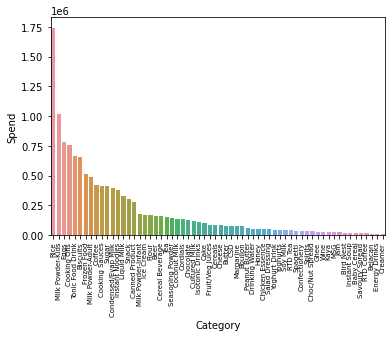

In [15]:
#print(data['Category'].value_counts()[0:10])
cat_analysis = data.groupby('Category').agg({'Spend': lambda x: sum(x)})
cat_analysis = cat_analysis.reset_index()
cat_analysis = cat_analysis.sort_values(by=['Spend'], ascending = False)
chart = sns.barplot(x=cat_analysis['Category'], y=cat_analysis['Spend'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90, fontsize='x-small')

In [23]:
cat_analysis['Revenue']= cat_analysis['Spend'].cumsum()
#print(cat_analysis.head(15))
top_15_revenue = cat_analysis.iloc[14, 2]
total_revenue = cat_analysis.tail(1)['Revenue']
print(f"Percentage that top_15_products make up the revenue: {round(float(top_15_revenue/total_revenue)*100, 2)}%")

Percentage that top_15_products make up the revenue: 72.87%


The top 15 sold products made up 72.87% of the revenue. These products are mostly households essentials as in the most popular products list.

## RFM Analysis of the data

In [15]:
refDate = pd.to_datetime('20200615', format='%Y%m%d') #Creating the baseline date (2015-04-01)
rfmModel = data.groupby('Panel ID').agg({'Date': lambda x: (refDate-x.max()).days,    #Creating the RFM model dataframe
                                         'Panel ID': lambda x: len(x),
                                         'Spend': lambda x : x.sum()} )

rfmModel.rename(columns={'Date' : 'Recency','Panel ID' : 'Frequency', 'Spend':'Monetary'},inplace=True)
rfmModel = rfmModel.reset_index()
rfmModel.head()

,Panel ID,Recency,Frequency,Monetary
0,Panel 101011101,15,404,3902.2
1,Panel 101016101,8,326,1888.2
2,Panel 101019101,1,1730,7333.3
3,Panel 101024101,1,1004,5990.7
4,Panel 105009103,1,1273,4749.1


count    3236.000000
mean      224.097960
std       331.800198
min         1.000000
25%         1.000000
50%         8.000000
75%       393.000000
max      1086.000000
Name: Recency, dtype: float64


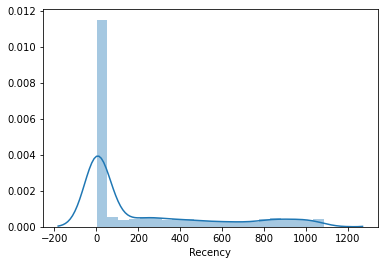

In [16]:
print(rfmModel.Recency.describe())
x = rfmModel['Recency']
distplot = sns.distplot(x)

count    3236.000000
mean      407.300371
std       405.652292
min         1.000000
25%       108.000000
50%       314.000000
75%       575.250000
max      4513.000000
Name: Frequency, dtype: float64


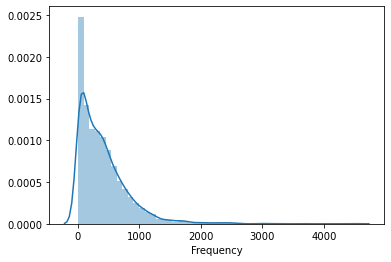

In [17]:
print(rfmModel.Frequency.describe())
x = rfmModel['Frequency']
distplot = sns.distplot(x)

count     3236.000000
mean      3934.708900
std       3702.502643
min          9.800000
25%       1096.700000
50%       3062.450000
75%       5690.850000
max      45635.500000
Name: Monetary, dtype: float64


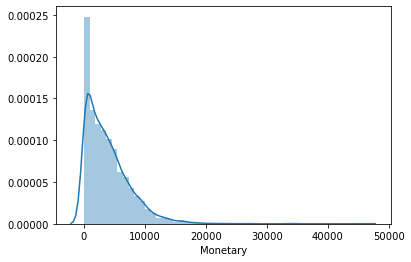

In [18]:
print(rfmModel.Monetary.describe())
x = rfmModel['Monetary']
distplot = sns.distplot(x)

In [19]:
quantiles = rfmModel.quantile(q=[0.2,0.4,0.6,0.8]) # Get a dataframe of quantiles for each column
quantiles = quantiles.to_dict() #Convert the dataframe into a nested dictionary of quantiles
print(quantiles)

{'Recency': {0.2: 1.0, 0.4: 1.0, 0.6: 57.0, 0.8: 519.0}, 'Frequency': {0.2: 73.0, 0.4: 223.0, 0.6: 403.0, 0.8: 655.0}, 'Monetary': {0.2: 722.3, 0.4: 2243.0, 0.6: 4003.8, 0.8: 6508.1}}


In [20]:
def RScores(x,p,d):   #Functions to get the RFM scores. For R scores, the smaller the number the higher the rank (most recent)
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1
    
def FMScores(x,p,d):     #Function to get F and M scores. For F and M, the higher the rank, the more frequent and the more money
    if x <= d[p][0.2]:   #has been spent from the customer
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [21]:
#Apply a function along a column of the dataFrame.

rfmModel['R'] = rfmModel['Recency'].apply(RScores,args=('Recency',quantiles))
rfmModel['F'] = rfmModel['Frequency'].apply(FMScores,args=('Frequency',quantiles))
rfmModel['M'] = rfmModel['Monetary'].apply(FMScores,args=('Monetary',quantiles))
rfmModel['RFM'] = rfmModel.R.map(str) + rfmModel.F.map(str) + rfmModel.M.map(str)
rfmModel.head()

,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM
0,Panel 101011101,15,404,3902.2,3,4,3,343
1,Panel 101016101,8,326,1888.2,3,3,2,332
2,Panel 101019101,1,1730,7333.3,5,5,5,555
3,Panel 101024101,1,1004,5990.7,5,5,4,554
4,Panel 105009103,1,1273,4749.1,5,5,4,554


### Make Clusters based on quantile of R, F, M respectively

In [22]:
mean_group = rfmModel[['R','F','M']].quantile([.25, .5,.75])
print(mean_group)

        R    F    M
0.25  2.0  2.0  2.0
0.50  3.0  3.0  3.0
0.75  5.0  4.0  4.0


In [23]:
# cluster based on R, F, M value. The value is decided based on 0.75 and 0.25 quantile.
def group(df):
    if (df['R'] >= 5) & (df['F'] >= 4) & (df['M'] >= 4):
        return 'loyal'   
    elif (df['R'] >= 5) & (df['F'] <=2) & (df['M'] <=2):
        return 'new'
    elif (df['R'] <=2 ) & (df['F'] >= 4) & (df['M'] >= 4):
        return 'churn'

In [24]:
rfmModel['status'] = rfmModel.apply(group, axis=1)

In [25]:
rfmModel['status'].value_counts()

loyal    815
new      128
churn     82
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

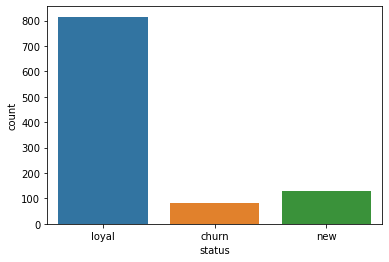

In [35]:
sns.countplot(rfmModel['status'])

### Customers Driving the Revenue

In [38]:
print(sum(rfmModel[rfmModel['status']=='loyal'].Monetary)/sum(rfmModel.Monetary))
loyal=rfmModel[rfmModel['status']=='loyal']

0.5079064187237962


This figure means that these 815 loyal customers make up over 50 percent of revenue. This means that they are very valuable customers.

## Products to Recommend to Customers Based on BMI

In [39]:
panel_data["BMI"].unique()

array(['Obese', 'Healthy', 'Over Weight', 'Under Weight', 'Not Available'],
      dtype=object)

In [26]:
joint_df = data.merge(panel_data, how= 'left',left_on = 'Panel ID', right_on = 'ID' )
joint_df.drop(columns=['ID'],axis=1,inplace=True)
joint_df = joint_df.merge(cat_data, how="left", on="Category")
joint_df.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location,Calories/100g,Price per Volume
0,Panel 101011101,2017-07-02,CSD,1,1.5,1.5,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,44,2.20
1,Panel 101011101,2017-07-02,Soy Milk,1,1.0,2.8,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,45,3.03
2,Panel 101011101,2017-07-02,Cooking Sauces,1,0.3,3.2,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,175,8.40
3,Panel 101011101,2017-07-02,Coconut Milk,2,0.4,5.3,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,233,11.15
4,Panel 101011101,2017-07-02,Chocolate,1,0.2,6.6,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,529,47.14


In [54]:
unique_panel = joint_df.groupby('Panel ID').first()
unique_panel['BMI'].value_counts()

Healthy         1243
Over Weight      796
Under Weight     748
Obese            449
Name: BMI, dtype: int64

In [56]:
BMI_analysis = joint_df.groupby(['BMI','Category']).agg({'Spend': lambda x : x.sum()})
BMI_top_10 = BMI_analysis.sort_values(['BMI','Spend'], ascending=False).reset_index()
BMI_top_10 = BMI_top_10.groupby(['BMI']).head(10)
BMI_top_10['Number_Panel'] = [748,]*10 + [796,]*10 + [449,]*10 + [1243,]*10
BMI_top_10['Average_Spend'] = BMI_top_10['Spend']/BMI_top_10['Number_Panel']
print(BMI_top_10)

              BMI             Category     Spend  Number_Panel  Average_Spend
0    Under Weight                 Rice  306907.1           748     410.303610
1    Under Weight     Milk Powder-Kids  241075.3           748     322.293182
2    Under Weight         Cooking Oils  132348.0           748     176.935829
3    Under Weight                 Eggs  125833.0           748     168.225936
4    Under Weight     Tonic Food Drink  121996.3           748     163.096658
5    Under Weight             Biscuits  115605.9           748     154.553342
6    Under Weight    Milk Powder-Adult  100297.3           748     134.087299
7    Under Weight          Frozen Food   88864.5           748     118.802807
8    Under Weight               Coffee   70166.2           748      93.805080
9    Under Weight      Instant Noodles   68923.8           748      92.144118
62    Over Weight                 Rice  491741.3           796     617.765452
63    Over Weight     Milk Powder-Kids  275113.5           796  

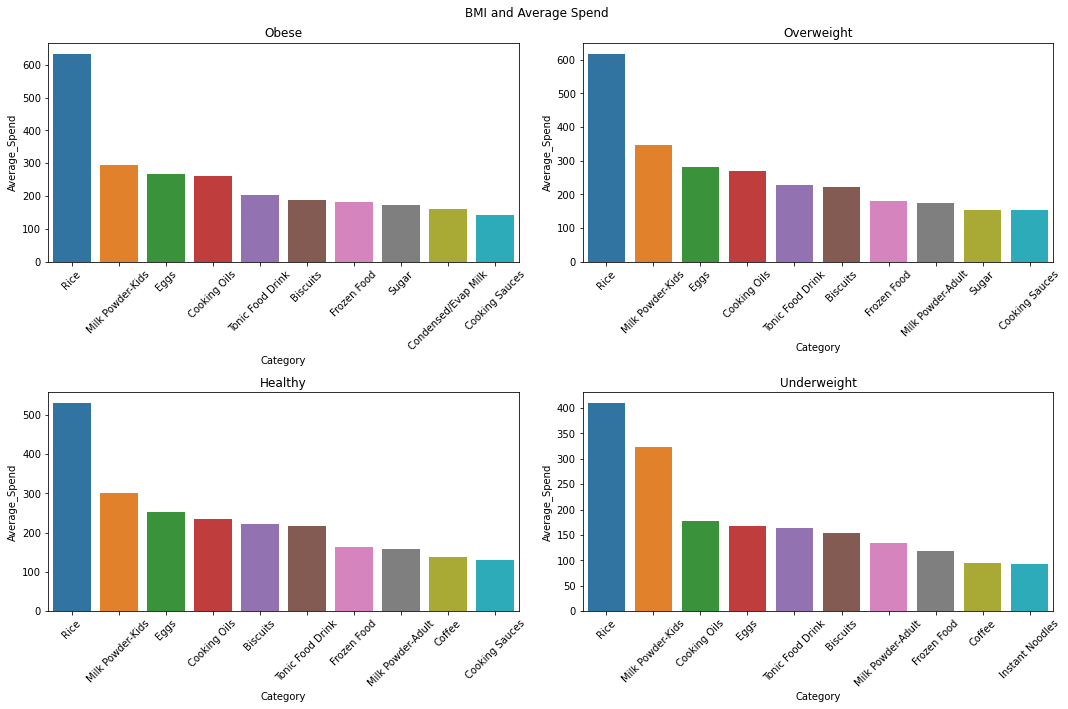

In [72]:
# make a plot to visualize the data
fig, axes = plt.subplots(2, 2,figsize = (15, 10))
axes = axes.flatten()
under_weight = BMI_top_10[BMI_top_10["BMI"]=="Under Weight"]
over_weight = BMI_top_10[BMI_top_10["BMI"]=="Over Weight"]
obese = BMI_top_10[BMI_top_10["BMI"]=="Obese"]
healthy = BMI_top_10[BMI_top_10["BMI"]=="Healthy"]

plot1 = sns.barplot( x=obese["Category"], y=obese["Average_Spend"], orient='v',ax=axes[0] )
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=45)
plot1.set_title("Obese")
plot2 = sns.barplot( x=over_weight["Category"], y=over_weight["Average_Spend"],orient='v',ax=axes[1] )
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=45)
plot2.set_title("Overweight")
plot3 = sns.barplot( x=healthy["Category"], y=healthy["Average_Spend"], orient='v',ax=axes[2])
plot3.set_xticklabels(plot3.get_xticklabels(),rotation=45)
plot3.set_title("Healthy")
plot4 = sns.barplot( x=under_weight["Category"], y=under_weight["Average_Spend"], orient='v',ax=axes[3] )
plot4.set_xticklabels(plot4.get_xticklabels(),rotation=45)
plot4.set_title("Underweight")

fig.suptitle('BMI and Average Spend')
fig.tight_layout()
plt.savefig("../data/BMI&Spend.png")


From the figures and the graph, overweight and obese people tend to spend more money on average than healthy and underweight people. Especially they spend more on Rice, Eggs, and Cooking Oils, this means the client can try to promote these products to these groups. Underweight people tend to spend least money in these 4 categories.

## Market Basket Analysis

In [11]:
from mlxtend.frequent_patterns import apriori #Function for the apriori algorithm
from mlxtend.frequent_patterns import association_rules #Function for finding association rules

In [42]:
joint_df["Panel ID"]=joint_df["Panel ID"].astype('str')
joint_df["Date"]=joint_df["Date"].astype('str')

In [39]:
joint_df = data.merge(rfmModel, how= 'left',left_on = 'Panel ID', right_on = 'Panel ID' )

In [40]:
joint_df.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend,Recency,Frequency,Monetary,R,F,M,RFM,status
0,Panel 101011101,2017-07-02,CSD,1,1.5,1.5,15,404,3902.2,3,4,3,343,None
1,Panel 101011101,2017-07-02,Soy Milk,1,1.0,2.8,15,404,3902.2,3,4,3,343,None
2,Panel 101011101,2017-07-02,Cooking Sauces,1,0.3,3.2,15,404,3902.2,3,4,3,343,None
3,Panel 101011101,2017-07-02,Coconut Milk,2,0.4,5.3,15,404,3902.2,3,4,3,343,None
4,Panel 101011101,2017-07-02,Chocolate,1,0.2,6.6,15,404,3902.2,3,4,3,343,None


In [43]:
joint_df['Transaction'] = joint_df['Panel ID'].str.cat(joint_df['Date'],sep="")
joint_df.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend,Recency,Frequency,Monetary,R,F,M,RFM,status,Transaction
0,Panel 101011101,2017-07-02,CSD,1,1.5,1.5,15,404,3902.2,3,4,3,343,None,Panel 1010111012017-07-02
1,Panel 101011101,2017-07-02,Soy Milk,1,1.0,2.8,15,404,3902.2,3,4,3,343,None,Panel 1010111012017-07-02
2,Panel 101011101,2017-07-02,Cooking Sauces,1,0.3,3.2,15,404,3902.2,3,4,3,343,None,Panel 1010111012017-07-02
3,Panel 101011101,2017-07-02,Coconut Milk,2,0.4,5.3,15,404,3902.2,3,4,3,343,None,Panel 1010111012017-07-02
4,Panel 101011101,2017-07-02,Chocolate,1,0.2,6.6,15,404,3902.2,3,4,3,343,None,Panel 1010111012017-07-02


In [44]:
joint_df['Ones']= 1

In [45]:
#loyal cluster basket analysis
#------------------------------

In [46]:
loyal=joint_df[joint_df["status"]=="loyal"]
loyal.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend,Recency,Frequency,Monetary,R,F,M,RFM,status,Transaction,Ones
730,Panel 101019101,2017-06-25,Tonic Food Drink,1,0.2,1.8,1,1730,7333.3,5,5,5,555,loyal,Panel 1010191012017-06-25,1
731,Panel 101019101,2017-06-25,Eggs,1,5.0,1.8,1,1730,7333.3,5,5,5,555,loyal,Panel 1010191012017-06-25,1
732,Panel 101019101,2017-06-25,Canned Product,1,0.2,3.2,1,1730,7333.3,5,5,5,555,loyal,Panel 1010191012017-06-25,1
733,Panel 101019101,2017-06-25,Rice,3,3.0,14.4,1,1730,7333.3,5,5,5,555,loyal,Panel 1010191012017-06-25,1
734,Panel 101019101,2017-06-25,Sugar,1,1.0,2.9,1,1730,7333.3,5,5,5,555,loyal,Panel 1010191012017-06-25,1


In [47]:
basket_loyal = loyal.groupby(["Transaction","Category"])["Ones"].sum().unstack().fillna(0).reset_index().set_index("Transaction")
basket_loyal=basket_loyal.apply(lambda x: [y if y < 1 else 1 for y in x])
basket_loyal.head()

Category,Baby Cereal,Beer,Belacan,Bird Nest,Biscuits,Bouilon,Butter,CSD,Cake,Canned Product,...,Snack,Soy Milk,Spagetti,Spirits,Sugar,Tea,Tonic Food Drink,Wine,Yoghurt Drink,Yoghurts
Transaction,,,,,,,,,,,,,,,,,,,,,
Panel 1010191012017-06-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Panel 1010191012017-07-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Panel 1010191012017-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Panel 1010191012017-07-16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Panel 1010191012017-07-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [48]:
frequent_itemsets_loyal = apriori(basket_loyal,min_support=0.1,use_colnames = True) 
frequent_itemsets_loyal.head()

,support,itemsets
0,0.337511,(Biscuits)
1,0.160758,(Canned Product)
2,0.106395,(Coconut Milk)
3,0.163138,(Coffee)
4,0.239281,(Condensed/Evap Milk)


In [49]:
rules_loyal = association_rules(frequent_itemsets_loyal, metric="confidence",min_threshold = 0.25) #25% confidence
rules_loyal.drop(['leverage','conviction'],axis=1,inplace=True)
rules_loyal=rules_loyal.sort_values(by=['lift'],ascending=False) #Sort rules by descending Lift
rules_loyal

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
10,(Sugar),(Condensed/Evap Milk),0.280721,0.239281,0.111088,0.395725,1.653812
11,(Condensed/Evap Milk),(Sugar),0.239281,0.280721,0.111088,0.464259,1.653812
17,(Cooking Oils),(Sugar),0.263943,0.280721,0.120569,0.456798,1.627234
16,(Sugar),(Cooking Oils),0.280721,0.263943,0.120569,0.429497,1.627234
29,(Sugar),(Rice),0.280721,0.277250,0.122622,0.436810,1.575513
28,(Rice),(Sugar),0.277250,0.280721,0.122622,0.442279,1.575513
14,(Rice),(Cooking Oils),0.277250,0.263943,0.111853,0.403440,1.528510
15,(Cooking Oils),(Rice),0.263943,0.277250,0.111853,0.423779,1.528510
4,(Snack),(Biscuits),0.223352,0.337511,0.114308,0.511781,1.516342
5,(Biscuits),(Snack),0.337511,0.223352,0.114308,0.338678,1.516342


In [ ]:
#All population
#--------------------------

In [50]:
basket_set = joint_df.groupby(["Transaction","Category"])["Ones"].sum().unstack().fillna(0).reset_index().set_index("Transaction")
basket_set=basket_set.apply(lambda x: [y if y < 1 else 1 for y in x])
basket_set

Category,Baby Cereal,Beer,Belacan,Bird Nest,Biscuits,Bouilon,Butter,CSD,Cake,Canned Product,...,Snack,Soy Milk,Spagetti,Spirits,Sugar,Tea,Tonic Food Drink,Wine,Yoghurt Drink,Yoghurts
Transaction,,,,,,,,,,,,,,,,,,,,,
Panel 1010111012017-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panel 1010111012017-07-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panel 1010111012017-07-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panel 1010111012017-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panel 1010111012017-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Panel 8019128012020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panel 8019128012020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panel 8019128012020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
frequent_itemsets = apriori(basket_set,min_support=0.1,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.291034,(Biscuits)
1,0.126396,(Canned Product)
2,0.135118,(Coffee)
3,0.205656,(Condensed/Evap Milk)
4,0.229187,(Cooking Oils)
5,0.219438,(Cooking Sauces)
6,0.361242,(Eggs)
7,0.154029,(Flour)
8,0.156187,(Frozen Food)
9,0.219170,(Instant Noodles)


In [52]:
rules = association_rules(frequent_itemsets, metric="confidence",min_threshold = 0.25) #25% confidence
rules.drop(['leverage','conviction'],axis=1,inplace=True)
rules=rules.sort_values(by=['lift'],ascending=False) #Sort rules by descending Lift
rules.head(n=30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
9,(Sugar),(Rice),0.242486,0.254897,0.105566,0.435350,1.707945
8,(Rice),(Sugar),0.254897,0.242486,0.105566,0.414153,1.707945
6,(Eggs),(Sugar),0.361242,0.242486,0.121977,0.337661,1.392496
7,(Sugar),(Eggs),0.242486,0.361242,0.121977,0.503028,1.392496
4,(Rice),(Eggs),0.254897,0.361242,0.120959,0.474541,1.313637
5,(Eggs),(Rice),0.361242,0.254897,0.120959,0.334842,1.313637
2,(Eggs),(Cooking Oils),0.361242,0.229187,0.104925,0.290457,1.267337
3,(Cooking Oils),(Eggs),0.229187,0.361242,0.104925,0.457816,1.267337
0,(Eggs),(Biscuits),0.361242,0.291034,0.107652,0.298004,1.023951
1,(Biscuits),(Eggs),0.291034,0.361242,0.107652,0.369894,1.023951
